# Setting Up - Install Packages in the Workspace
Before you move on to the project instruction, follow the cells below to ensure you have the necessary packages installed. 
The cells below will also educate you on installing newer pinned packages, should you need them in the future. 

In [1]:
# Step 1. Update the PATH env var. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/home/student/.local/bin"
os.environ['PATH'] = f"{os.environ['PATH']}:/opt/conda/lib/python3.10/site-packages"
os.environ['PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION'] = 'python'

In [2]:
# Check the version of any specific package
!python -m pip freeze | grep numpy

numpy @ file:///work/mkl/numpy_and_numpy_base_1682953417311/work


# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [3]:
!pip -q install .

The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [1]:
# Restart the Kernel. 
# If you skip this step, your notebook may not be able to import the packages well. 


In [2]:
from unityagents import UnityEnvironment
import numpy as np

# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

Found path: /data/Banana_Linux_NoVis/Banana.x86_64
Mono path[0] = '/data/Banana_Linux_NoVis/Banana_Data/Managed'
Mono config path = '/data/Banana_Linux_NoVis/Banana_Data/MonoBleedingEdge/etc'
Preloaded 'libgrpc_csharp_ext.x64.so'
Unable to preload the following plugins:
	libgrpc_csharp_ext.x86.so
PlayerPrefs - Creating folder: /home/student/.config/unity3d/Unity Technologies
PlayerPrefs - Creating folder: /home/student/.config/unity3d/Unity Technologies/Unity Environment
Logging to /home/student/.config/unity3d/Unity Technologies/Unity Environment/Player.log


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [5]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


When finished, you can close the environment.

In [6]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agent while it is training.  However, **_after training the agent_**, you can download the saved model weights to watch the agent on your own machine! 

# Restart the kernal before running the below

### Import libraries

In [1]:
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import os
import numpy as np
%matplotlib inline


from IPython import display

### Import the agent class, the environment, and create instances of them

In [2]:
from dqn_agent import Agent # Import the agent class
from unityagents import UnityEnvironment # Import the environment

# create the enviroment
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# Number of actions
action_size = brain.vector_action_space_size
# Number of dimensions in state
state_size = len(env_info.vector_observations[0])

# create an instance of the environment
agent = Agent(state_size=state_size, action_size=action_size, seed=0)

Found path: /data/Banana_Linux_NoVis/Banana.x86_64
Mono path[0] = '/data/Banana_Linux_NoVis/Banana_Data/Managed'
Mono config path = '/data/Banana_Linux_NoVis/Banana_Data/MonoBleedingEdge/etc'
Preloaded 'libgrpc_csharp_ext.x64.so'
Unable to preload the following plugins:
	libgrpc_csharp_ext.x86.so
Logging to /home/student/.config/unity3d/Unity Technologies/Unity Environment/Player.log


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode 100	Average Score: 0.71
Episode 200	Average Score: 3.19
Episode 300	Average Score: 7.21
Episode 400	Average Score: 10.12
Episode 480	Average Score: 13.02
Environment solved in 380 episodes!	Average Score: 13.02


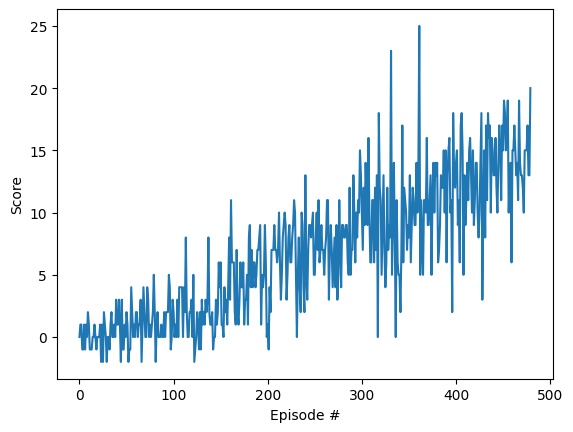

In [3]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    A class which handles the training process of Deep RL agent on envirmonet using the 
    Deep Q-Learning algorithem, it takes the params of training as an input and use it
    to train the agent on the envirmonet
    
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    
    
    for i_episode in range(1, n_episodes+1): # The training loop
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0] # Get the initial state
        score = 0
        for t in range(max_t): #loop till the maximum number of timesteps per episode is reached unless the episode is done
            action = agent.act(state, eps) # the agent decides the action based on the current state 
            
            env_info = env.step(action)[brain_name]   # Take the action
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished            

            agent.step(state, action, reward, next_state, done) # The agent takes a step
            state = next_state # Transtion into the next step
            score += reward # Add the recent reward to the episode total reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        
        # print the rolling statistics at each episode
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        
        # print the rolling statistics at each 100 episode
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        
        # If the rolling mean score for the last 100 episodes is equal to or higher then 13 then stop 
        if np.mean(scores_window)>=13:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            
            # save the model 
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

scores = dqn() # Run the training process

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### Read the saved model params

In [4]:
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))

<All keys matched successfully>

In [5]:
agent.qnetwork_local.state_dict()

OrderedDict([('fc1.weight',
              tensor([[ 0.1920, -0.0869, -0.1676,  ..., -0.7109, -0.0592, -0.0401],
                      [ 0.2032, -0.1661, -0.0963,  ..., -0.3712,  0.2945,  0.0451],
                      [ 0.0114,  0.1488,  0.0562,  ...,  0.0624, -0.0941, -0.0180],
                      ...,
                      [-0.0403,  0.0254,  0.1606,  ...,  0.1456,  0.0394,  0.0034],
                      [ 0.0202, -0.2155,  0.1869,  ...,  0.3603,  0.0215, -0.0046],
                      [-0.0331, -0.1000, -0.1335,  ...,  0.0128, -0.0211,  0.0126]],
                     device='cuda:0')),
             ('fc1.bias',
              tensor([ 0.1643, -0.0955, -0.1330, -0.0458,  0.0992,  0.0212, -0.1927,  0.0521,
                      -0.0436, -0.1466,  0.1580,  0.1190,  0.1217,  0.0755, -0.0114, -0.0805,
                       0.1012, -0.0370, -0.0062, -0.2390, -0.0623,  0.1028, -0.0324, -0.0287,
                      -0.0833,  0.0893,  0.0318, -0.1708,  0.1839,  0.0665, -0.1131, -0.1295